In [1]:
# Importações de Bibliotecas Necessárias
import pandas as pd
import numpy as np
import time

from datetime import datetime
from datetime import timedelta  

from random import seed
from random import randint
from random import uniform

from matplotlib import pyplot as plt
import seaborn as sns

import matplotlib.dates as md

In [7]:
# Importa dataset de climas para cada regiao

# Dataset From: https://www.data.act.gov.au/Transport/Smart-Parking-Stays/3vsj-zpk7

print("Reading CSV...")
df = pd.read_csv('Smart_Parking_Stays.csv')

print("Done!")
df

Reading CSV...
Done!


,SectorCode,SectorName,LotName,BayNumber,BayName,Arrived,Departed,Street
0,1,On Street,201 Bougainville St Disabled,2001,2001,01/01/2017 10:55:31 AM,01/01/2017 12:11:48 PM,Bougainville St
1,1,On Street,201 Bougainville St Disabled,2001,2001,01/01/2017 12:12:13 PM,01/01/2017 03:27:23 PM,Bougainville St
2,1,On Street,201 Bougainville St Disabled,2001,2001,01/01/2017 06:42:36 PM,01/01/2017 09:00:39 PM,Bougainville St
3,1,On Street,201 Bougainville St Disabled,2001,2001,02/01/2017 08:34:58 AM,02/01/2017 08:49:37 AM,Bougainville St
4,1,On Street,201 Bougainville St Disabled,2001,2001,02/01/2017 10:22:26 AM,02/01/2017 10:22:35 AM,Bougainville St
...,...,...,...,...,...,...,...,...
3717320,2,Off Street,602 Multi Storey Level 1 4P,103,103,12/01/2016 12:24:59 PM,12/01/2016 12:25:00 PM,Multi Storey
3717321,1,On Street,206 Bougainville St 2P Voucher,2071,2071,10/08/2016 07:35:21 AM,10/08/2016 08:14:23 AM,Bougainville St
3717322,1,On Street,312 Furneaux St 1/2P Voucher,3112,3112,18/01/2016 12:44:44 PM,18/01/2016 12:53:49 PM,Furneaux St
3717323,1,On Street,502 Captain Cook 1P Voucher,5021,5021,06/07/2016 02:38:07 PM,06/07/2016 03:00:06 PM,Captain Cook Cres


In [8]:
data = df[df[' SectorName'] == 'Off Street']
data

,SectorCode,SectorName,LotName,BayNumber,BayName,Arrived,Departed,Street
125159,2,Off Street,600 Multi Storey Level 1 EV,1,1,01/01/2017 11:10:00 AM,01/01/2017 11:10:12 AM,Multi Storey
125160,2,Off Street,600 Multi Storey Level 1 EV,1,1,01/01/2017 11:10:25 AM,01/01/2017 12:14:00 PM,Multi Storey
125161,2,Off Street,600 Multi Storey Level 1 EV,1,1,01/01/2017 12:18:58 PM,01/01/2017 03:14:35 PM,Multi Storey
125162,2,Off Street,600 Multi Storey Level 1 EV,1,1,01/01/2017 03:19:56 PM,01/01/2017 05:54:38 PM,Multi Storey
125163,2,Off Street,600 Multi Storey Level 1 EV,1,1,01/01/2017 06:12:22 PM,01/01/2017 07:08:21 PM,Multi Storey
...,...,...,...,...,...,...,...,...
3717307,2,Off Street,601 Multi Storey Ground 4P,4,4,01/07/2016 11:58:56 PM,01/07/2016 11:58:59 PM,Multi Storey
3717309,2,Off Street,602 Multi Storey Level 1 4P,103,103,10/05/2016 10:58:40 AM,10/05/2016 10:58:47 AM,Multi Storey
3717316,2,Off Street,601 Multi Storey Ground 4P,61,61,16/09/2016 12:18:06 PM,16/09/2016 12:18:23 PM,Multi Storey
3717319,2,Off Street,601 Multi Storey Ground 4P,54,54,08/03/2016 09:30:21 AM,08/03/2016 09:30:53 AM,Multi Storey


In [9]:
data2 = data[' LotName'].value_counts()
data2

601 Multi Storey Ground 4P     683570
602 Multi Storey Level 1 4P    337252
603 Multi Storey Roof 8P        59213
600 Multi Storey Level 1 EV      6329
Name:  LotName, dtype: int64

In [11]:
data3 = data[data[' LotName'] == '601 Multi Storey Ground 4P']
data3

,SectorCode,SectorName,LotName,BayNumber,BayName,Arrived,Departed,Street
125589,2,Off Street,601 Multi Storey Ground 4P,3,3,01/01/2017 10:55:43 AM,01/01/2017 12:39:01 PM,Multi Storey
125590,2,Off Street,601 Multi Storey Ground 4P,3,3,01/01/2017 12:39:56 PM,01/01/2017 03:30:11 PM,Multi Storey
125591,2,Off Street,601 Multi Storey Ground 4P,3,3,01/01/2017 03:32:40 PM,01/01/2017 06:11:19 PM,Multi Storey
125592,2,Off Street,601 Multi Storey Ground 4P,3,3,01/01/2017 06:11:52 PM,01/01/2017 09:10:53 PM,Multi Storey
125593,2,Off Street,601 Multi Storey Ground 4P,3,3,02/01/2017 10:03:12 AM,02/01/2017 03:41:41 PM,Multi Storey
...,...,...,...,...,...,...,...,...
3717295,2,Off Street,601 Multi Storey Ground 4P,15,15,22/10/2016 07:02:38 PM,22/10/2016 07:07:58 PM,Multi Storey
3717302,2,Off Street,601 Multi Storey Ground 4P,24,24,25/07/2016 10:47:09 PM,25/07/2016 10:47:16 PM,Multi Storey
3717307,2,Off Street,601 Multi Storey Ground 4P,4,4,01/07/2016 11:58:56 PM,01/07/2016 11:58:59 PM,Multi Storey
3717316,2,Off Street,601 Multi Storey Ground 4P,61,61,16/09/2016 12:18:06 PM,16/09/2016 12:18:23 PM,Multi Storey


In [52]:
print("Removing Columns & Setting as Time...")
final = data.drop(data.columns.difference([' Arrived']), axis=1)
final[' Arrived'] = pd.to_datetime(final[' Arrived'], errors='ignore')
print("Done!")
final

Removing Columns & Setting as Time...
Done!


,Arrived
125159,2017-01-01 11:10:00
125160,2017-01-01 11:10:25
125161,2017-01-01 12:18:58
125162,2017-01-01 15:19:56
125163,2017-01-01 18:12:22
...,...
3717307,2016-01-07 23:58:56
3717309,2016-10-05 10:58:40
3717316,2016-09-16 12:18:06
3717319,2016-08-03 09:30:21


In [84]:
# Restringindo o dataset para uma faixa de tempo de 1 ano válida (outros anos tem poucos meses de dados existentes)
final = final[((final[' Arrived'].dt.month <= 1) & (final[' Arrived'].dt.year == 2017)) | ((final[' Arrived'].dt.month >= 1) & (final[' Arrived'].dt.year == 2016))]
final = final.sort_values(by=[' Arrived'])
final

,Arrived
1596277,2016-01-01 00:00:02
1760179,2016-01-01 00:00:07
2729583,2016-01-01 00:00:26
2522626,2016-01-01 00:00:38
2052924,2016-01-01 00:00:38
...,...
128324,2017-01-31 22:48:46
153263,2017-01-31 23:33:13
153238,2017-01-31 23:33:34
153239,2017-01-31 23:41:57


In [85]:
print("Grouping by Date & Hour...")
df_hour = final.copy()
df_hour = df_hour.set_index(df_hour[' Arrived'])
df_hour['TotalParkings'] = 1
pd.to_datetime(df_hour.index, errors='ignore')
df_hour = df_hour.resample('H').sum()
print("Done!")
df_hour

Grouping by Date & Hour...
Done!


,TotalParkings
Arrived,
2016-01-01 00:00:00,222
2016-01-01 01:00:00,247
2016-01-01 02:00:00,251
2016-01-01 03:00:00,255
2016-01-01 04:00:00,267
...,...
2017-01-31 19:00:00,24
2017-01-31 20:00:00,10
2017-01-31 21:00:00,1


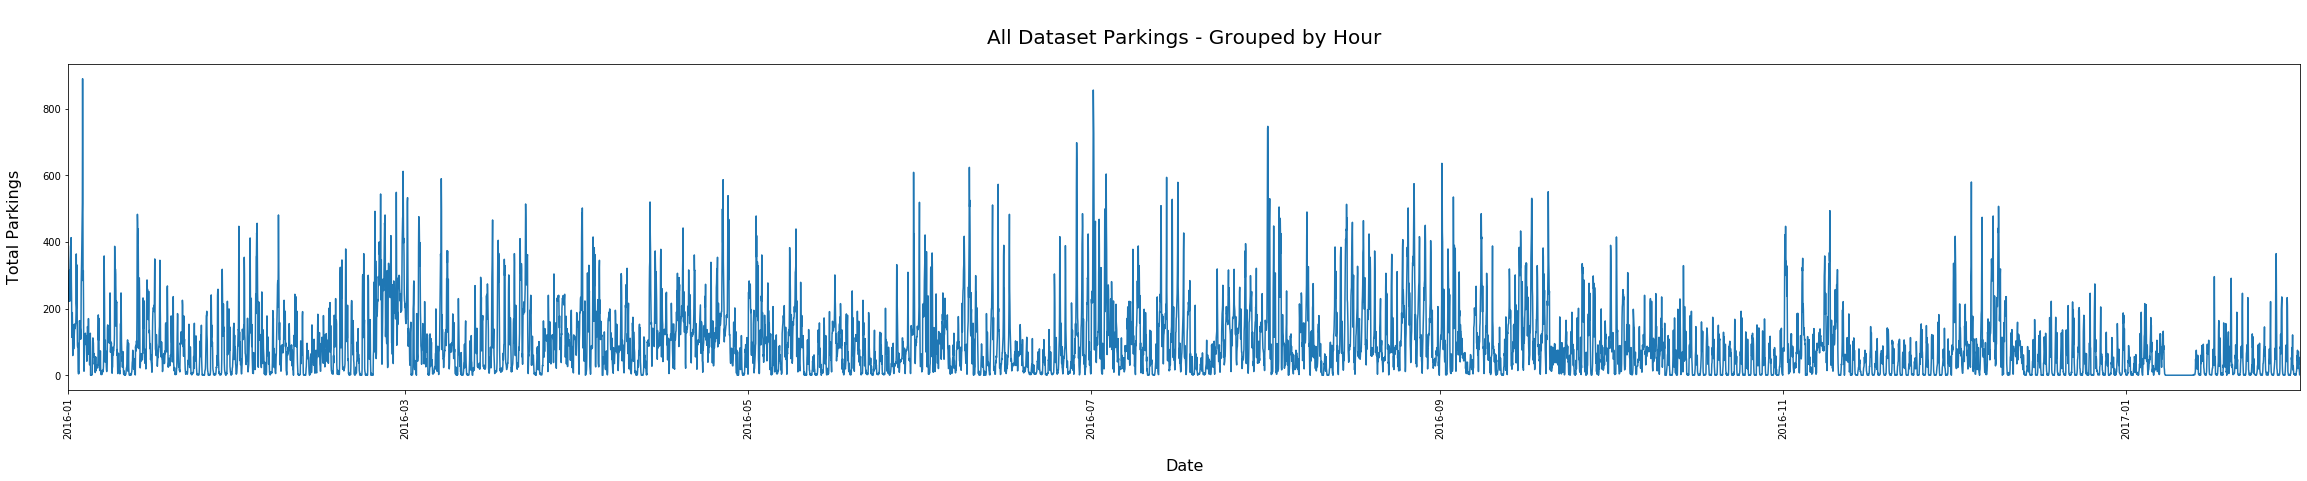

In [86]:
plt.subplots(figsize=(40,6))
plt.title("\nAll Dataset Parkings - Grouped by Hour", fontsize=20, pad=20)
plt.xlabel("Date", fontsize=16, labelpad=20)
plt.ylabel("Total Parkings", fontsize=16, labelpad=20)

plt.margins(x=0)
plt.figure(1).set_facecolor((1, 1, 1))
plt.xticks(rotation=90)

plt.plot(df_hour)

In [91]:
print("Grouping by Day...")
df_day = final
df_day = df_day.groupby(df_day[' Arrived'].dt.date).size().reset_index(name='TotalParkings')
df_day = df_day.set_index(df_day[' Arrived'], drop=True)
df_day.drop(' Arrived', axis=1, inplace=True)
print("Done!")
df_day

Grouping by Day...
Done!


,TotalParkings
Arrived,
2016-01-01,5725
2016-01-02,3100
2016-01-03,5955
2016-01-04,2472
2016-01-05,891
...,...
2017-01-27,1521
2017-01-28,1335
2017-01-29,1050


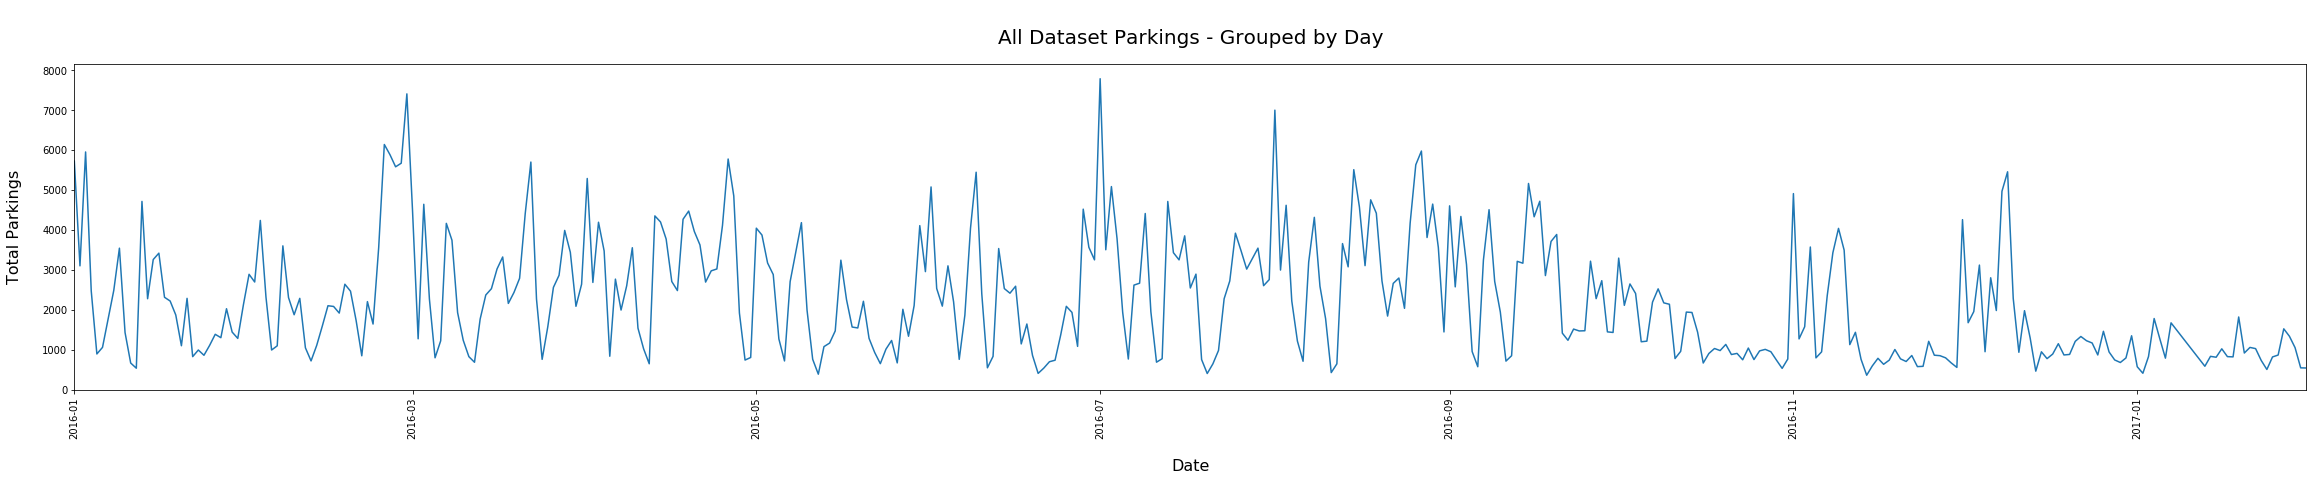

In [92]:
plt.subplots(figsize=(40,6))
plt.title("\nTotal: ", fontsize=30, pad=20)
plt.title("\nAll Dataset Parkings - Grouped by Day", fontsize=20, pad=20)
plt.xlabel("Date", fontsize=16, labelpad=20)
plt.ylabel("Total Parkings", fontsize=16, labelpad=20)

plt.margins(x=0)
plt.figure(1).set_facecolor((1, 1, 1))
plt.xticks(rotation=90)

plt.plot(df_day)

In [93]:
df_month = final.copy()
df_month['TotalParkings'] = 1
print("Grouping by Month...")
df_month = df_month.groupby(pd.Grouper(freq='M', key=' Arrived')).sum().reset_index()
df_month[' Arrived'] = df_month[' Arrived'].dt.strftime('%m-%Y')
df_month = df_month.set_index(df_month[' Arrived'], drop=True)
df_month.drop(' Arrived', axis=1, inplace=True)
df_month = df_month.rename(columns={"index": "TotalParkings"})
print("Done!")
df_month

Grouping by Month...
Done!


,TotalParkings
Arrived,
01-2016,66401
02-2016,80623
03-2016,79937
04-2016,91327
05-2016,62214
06-2016,65760
07-2016,87012
08-2016,102090
09-2016,79384


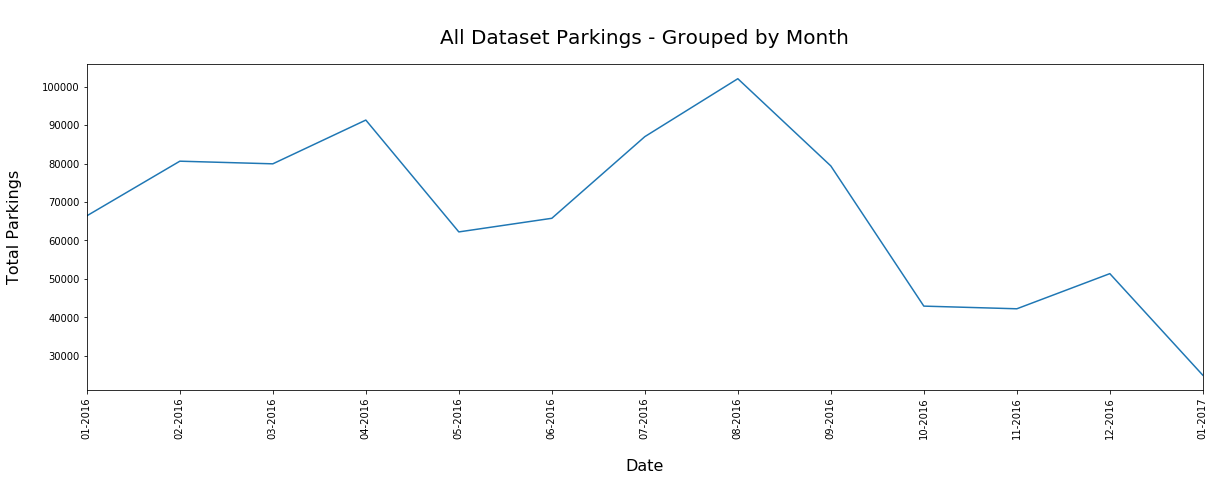

In [97]:
plt.subplots(figsize=(20,6))
plt.title("\nTotal: ", fontsize=30, pad=20)
plt.title("\nAll Dataset Parkings - Grouped by Month", fontsize=20, pad=20)
plt.xlabel("Date", fontsize=16, labelpad=20)
plt.ylabel("Total Parkings", fontsize=16, labelpad=20)

plt.margins(x=0)
plt.figure(1).set_facecolor((1, 1, 1))
plt.xticks(rotation=90)

plt.plot(df_month)

In [96]:
print("Writing output file...")
final.to_csv('Parking-Oficial-Dataset-OffStreet.csv', index=False)
print("Done!")

Writing output file...
Done!
